## 고양이 수염 이미지 합성 프로젝트
고양이 수염을 사람 얼굴에 합성하는 프로젝트입니다.  
다음과 같은 단계로 진행됩니다:

1. 얼굴 검출 (OpenCV 사용)
2. 랜드마크 추출
3. 수염 이미지 위치 및 크기 조정
4. 합성 및 결과 출력

### 사용 패키지
- OpenCV
- Dlib
- Numpy
- Matplotlib

In [305]:
# 필요한 패키지 import 하기
import os # 환경 변수나 디렉터리, 파일 등의 OS 자원을 제어할 수 있게 해주는 모듈
import cv2 # OpenCV라이브러리 → 컴퓨터 비전 관련 프로그래밍을 쉽게 할 수 있도록 도와주는 라이브러리
import matplotlib.pyplot as plt # 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 라이브러리
import numpy as np # 다차원 배열을 쉽게 처리하고 효율적으로 사용할 수 있도록 하는 라이브러리
import dlib # 이미지 처리 및 기계 학습, 얼굴인식 등을 할 수 있는 c++ 로 개발된 고성능의 라이브러리 
print("🌫🛸")

🌫🛸


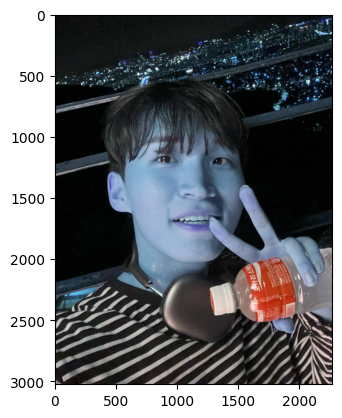

In [306]:
my_image_path = '/home/minho/aiffel/AIFFEL_quest_rs/Exploration/Ex03/me.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

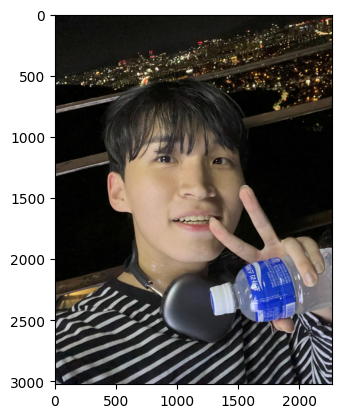

In [307]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [308]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [309]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(613, 869) (1763, 2019)]]


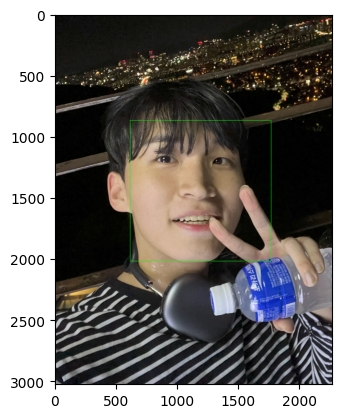

In [310]:
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [311]:
model_path = '/home/minho/aiffel/AIFFEL_quest_rs/Exploration/Ex03/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [312]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


In [313]:
for idx, landmark in enumerate(list_landmarks):
    print(f"얼굴 {idx+1}의 랜드마크 좌표 개수: {len(landmark)}")
    for point in landmark:
        print(point)  # (x, y) 좌표 출력

얼굴 1의 랜드마크 좌표 개수: 68
(558, 1256)
(574, 1406)
(604, 1553)
(642, 1691)
(704, 1806)
(801, 1902)
(915, 1976)
(1043, 2032)
(1170, 2046)
(1285, 2020)
(1366, 1939)
(1427, 1841)
(1474, 1725)
(1506, 1603)
(1522, 1489)
(1523, 1376)
(1508, 1262)
(720, 1114)
(797, 1026)
(905, 991)
(1023, 1002)
(1130, 1048)
(1227, 1065)
(1304, 1036)
(1388, 1035)
(1465, 1071)
(1497, 1150)
(1168, 1173)
(1176, 1261)
(1186, 1345)
(1195, 1434)
(1055, 1505)
(1120, 1519)
(1181, 1533)
(1231, 1518)
(1280, 1502)
(829, 1200)
(881, 1168)
(938, 1166)
(996, 1201)
(939, 1209)
(882, 1209)
(1275, 1213)
(1326, 1183)
(1382, 1186)
(1425, 1216)
(1378, 1219)
(1326, 1219)
(937, 1692)
(1038, 1644)
(1126, 1622)
(1190, 1626)
(1248, 1614)
(1313, 1628)
(1353, 1661)
(1316, 1720)
(1258, 1753)
(1198, 1763)
(1132, 1762)
(1040, 1749)
(966, 1692)
(1125, 1659)
(1190, 1661)
(1247, 1655)
(1334, 1663)
(1254, 1705)
(1196, 1717)
(1131, 1720)


In [314]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# → rectangles[[(345, 98) (531, 284)]]
# list_landmarks : 68개의 랜드마크 값 저장(이목구비 위치(x,y))
# → [[(368, 153), (368, 174), (371, 195), (376, 215), (382, 235), (391, 252), (404, 266), (420, 277), (441, 279), (461, 276), (480, 266), (495, 252), (508, 235), (516, 216), (520, 195), (523, 173), (524, 151), (377, 131), (386, 119), (399, 116), (413, 118), (425, 124), (454, 121), (466, 114), (481, 112), (494, 114), (503, 127), (439, 143), (438, 156), (438, 169), (437, 182), (423, 197), (431, 199), (438, 200), (446, 199), (454, 197), (391, 147), (399, 142), (409, 143), (416, 149), (408, 150), (399, 150), (464, 147), (472, 141), (482, 141), (489, 145), (482, 149), (473, 149), (411, 227), (421, 222), (432, 218), (439, 220), (446, 218), (458, 222), (471, 227), (458, 234), (446, 238), (438, 238), (431, 238), (420, 235), (415, 227), (432, 227), (439, 228), (447, 227), (466, 227), (446, 228), (438, 229), (431, 228)]]

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1195, 1434)
(x,y) : (1195,1434)
(w,h) : (1151,1151)


In [315]:
sticker_path = '/home/minho/aiffel/AIFFEL_quest_rs/Exploration/Ex03/cat.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(512, 512, 4)
(1151, 1151, 4)


In [316]:
# x,y,w,h 모두 위에서 반복문 안에서 지정해준 값임
# x는 이미지에서 코 부위의 x값 = 437
# y는 이미지에서 코 부위의 y값 = 89
# w는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
# h는 얼굴 영역의 가로를 차지하는 픽셀의 수 = 187
refined_x = x - w // 2 # 437 - (187//2) = 437-93 = 344
refined_y = y - h // 2# 89-187 = -98
# 원본 이미지에 2스티커 이미지를 추가하기 위해서 x, y 좌표를 조정합니다. 이미지 시작점은 top-left 좌표이기 때문입니다.
# 즉, refined_x, refined_y값에서 왕관 이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남
# 우리는 현재 이마 자리에 왕관을 두고 싶은건데, 이마위치 - 왕관 높이를 했더니 이미지의 범위를 초과하여 음수가 나오는 것
# opencv는 ndarray데이터를 사용하는데, ndarray는 음수인덱스에 접근 불가하므로 스티커 이미지를 잘라 줘야 한다.

(x,y) : (620,859)


슝~


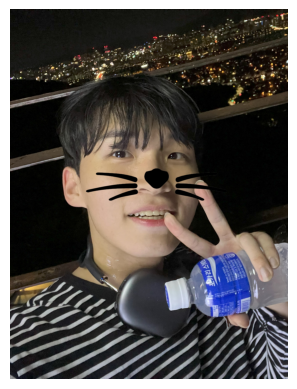

In [ ]:
# 스티커 크기 조정 및 좌표 보정
sticker_h, sticker_w = img_sticker.shape[:2]
h, w, _ = img_bgr.shape

# 좌표 범위 조정 (음수 방지)
refined_x = max(refined_x, 0)
refined_y = max(refined_y, 0)

# 스티커가 이미지 크기를 초과하지 않도록 조정
if refined_x + sticker_w > w:
    sticker_w = w - refined_x
if refined_y + sticker_h > h:
    sticker_h = h - refined_y

# 스티커 적용할 영역을 추출 (RGB 부분만)
sticker_area = img_bgr[refined_y:refined_y+sticker_h, refined_x:refined_x+sticker_w]

# 스티커의 알파 채널 분리
sticker_rgb = img_sticker[:sticker_h, :sticker_w, :3]  # RGB 채널만 추출
alpha_channel = img_sticker[:sticker_h, :sticker_w, 3] / 255.0  # 알파 채널 (0~1 범위)

# sticker_area에 알파 채널 추가하여 RGB -> RGBA 형식 맞추기
sticker_area_rgba = cv2.cvtColor(sticker_area, cv2.COLOR_BGR2BGRA)

# 알파 블렌딩을 통해 배경과 스티커 합성
for c in range(0, 3):  # RGB 채널별 블렌딩 적용
    sticker_area_rgba[:, :, c] = (1.0 - alpha_channel) * sticker_area[:, :, c] + alpha_channel * sticker_rgb[:, :, c]

# 원본 이미지에 수정된 스티커 적용 (RGB로 변환 후 삽입)
img_bgr[refined_y:refined_y+sticker_h, refined_x:refined_x+sticker_w] = cv2.cvtColor(sticker_area_rgba, cv2.COLOR_BGRA2BGR)

# 결과 확인
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### **다양한 원본 이미지에 적용했을 때의 문제점 및 해결 방안**


#### 1. 얼굴 각도  
- 문제점:  
  얼굴이 정면이 아닌 경우, 랜드마크의 정확도가 저하되어 스티커의 위치가 어긋날 수 있음.  

- 해결 방안:  
  3D 랜드마크 모델을 활용하여 얼굴의 기울기에 따라 스티커 위치를 조정.  
  예를 들어, 얼굴의 회전 각도를 고려하여 좌표 변환을 적용할 수 있음.



#### 2. 이미지 밝기  
- 문제점:  
  어두운 환경에서는 얼굴 검출 성능이 저하되어 스티커 위치가 정확하지 않을 수 있음.  
  조명이 너무 강할 경우 얼굴 일부가 날아가 랜드마크 인식이 어려움.  

- 해결 방안:  
  이미지의 밝기를 조정하기 위해 히스토그램 평활화를 적용.  
  이를 통해 얼굴의 특징이 균등하게 분포되어 인식 성능이 개선됨.



#### 3. 촬영 거리  
- 문제점:
  가까운 거리에서는 얼굴이 크게 인식되고, 먼 거리에서는 얼굴이 작게 인식되어 스티커 크기가 적절히 조정되지 않는 문제 발생.  

- 해결 방안:  
  얼굴 바운딩 박스의 크기를 기준으로 스티커 크기를 동적으로 조정하여 자연스럽게 합성될 수

